In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from matplotlib.lines import Line2D

from astropy.io import ascii
from astropy.table import Table, Column, vstack, unique
import numpy as np
import re
import matplotlib.cm as cm
import sys

def import_snana(filename):
    start_data = False
    table = None
    
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
        
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
                
    
    table['MJD']    = table['MJD'].astype(float)
    table['MAG']    = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['MAGSYS'] = table['MAGSYS'].astype(str)

    return(table)

def ccolor(r,g,b):
    return((r/255.,g/255.,b/255., 1.0))

black=ccolor(0,0,0)
red=ccolor(255,0,0)
blue=ccolor(10,0,255)
green=ccolor(12,83,0)
magenta=ccolor(204,0,204)
goldenrod=ccolor(239,139,8)
orange=ccolor(204,102,0)

# Plotting parameters and functions
pad = 0.25
figsize = 10.0
rc('font',**{'family':'serif','serif':['Times'],'size':6.0*figsize})
rc('text', usetex=True, color=black)

def setup_plot(size=[1.8, 1.5]):

    fig, ax = plt.subplots()
    for i in ax.spines.keys(): ax.spines[i].set_linewidth(0.6*figsize)
    fig.set_size_inches(size[0]*figsize, size[1]*figsize)

    return(fig, ax)

def setup_ticks(ax):

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=0.3*figsize, top=True, bottom=True, left=True, right=True)
    ax.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=0.3*figsize, top=True, bottom=True, left=True, right=True)

def setup_axis_titles(ax, xtitle, ytitle):

        ax.set_xlabel(xtitle, labelpad=pad)
        ax.set_ylabel(ytitle, labelpad=pad)
        
def import_table(filename, telescope):
    table = Table.read(filename, names=('MJD','FLT','MAG','MAGERR'),format='ascii')
    col = Column([telescope]*len(table),name='TELESCOPE')
    table.add_column(col)
        
    varcol = Column(['OBS:']*len(table), name='VARLIST')
    flxcol = Column(10**(-0.4*(table['MAG']-27.5)),name='FLUXCAL')
    flecol = Column(table['MAGERR']*flxcol/1.086,name='FLUXCALERR')
    magsys = Column([None]*len(table), name='MAGSYS')
    
    table.add_column(varcol)
    table.add_column(flxcol)
    table.add_column(flecol)
    table.add_column(magsys)
    
    
    table['MJD']    = table['MJD'].astype(float)
    table['MAG']    = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['MAGSYS'] = table['MAGSYS'].astype(str)
    
    return(table)

def import_table2(filename):
    table = Table.read(filename,format='ascii')
    #col = Column([telescope]*len(table),name='TELESCOPE')
    
    #varcol = Column(['OBS:']*len(table), name='VARLIST')
    #flxcol = Column(10**(-0.4*(table['MAG']-27.5)),name='FLUXCAL')
    #flecol = Column(table['MAGERR']*flxcol/1.086,name='FLUXCALERR')
    #magsys = Column([None]*len(table), name='MAGSYS')
    
    #table.add_column(varcol)
    #table.add_column(flxcol)
    #table.add_column(flecol)
    #table.add_column(magsys)
    
    
    table['mjd']    = table['mjd'].astype(float)
    table['mag']    = table['mag'].astype(float)
    table['dmag'] = table['dmag'].astype(float)
    
    table.rename_column('mjd','MJD')
    table.rename_column('dmag','MAGERR')
    table.rename_column('mag','MAG')
    table.rename_column('filter','FLT')
    
    return(table)

table = import_table2('2020jfo_lightcurves')

   MJD    FLT  MAG   MAGERR  TELESCOPE  VARLIST FLUXCAL FLUXCALERR MAGSYS VARLIST: nondet
--------- --- ------ ------ ----------- ------- ------- ---------- ------ -------- ------
 58976.17   z  15.55   0.04     Thacher     0.0    0.04       0.04   None     OBS:  False
 58977.19   z 15.143  0.029     Thacher     0.0   0.029      0.029   None     OBS:  False
58978.193   z 14.925  0.016     Thacher     0.0   0.016      0.016   None     OBS:  False
58979.191   z 14.805  0.014     Thacher     0.0   0.014      0.014   None     OBS:  False
58981.196   z 14.741  0.014     Thacher     0.0   0.014      0.014   None     OBS:  False
58982.195   z 14.763  0.014     Thacher     0.0   0.014      0.014   None     OBS:  False
58983.221   z 14.822  0.015     Thacher     0.0   0.015      0.015   None     OBS:  False
 58983.29   z 14.805  0.004 Pan-STARRS1       0   0.004      0.004   None     OBS:  False
58984.196   z 14.863  0.018     Thacher     0.0   0.018      0.018   None     OBS:  False
58985.196 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

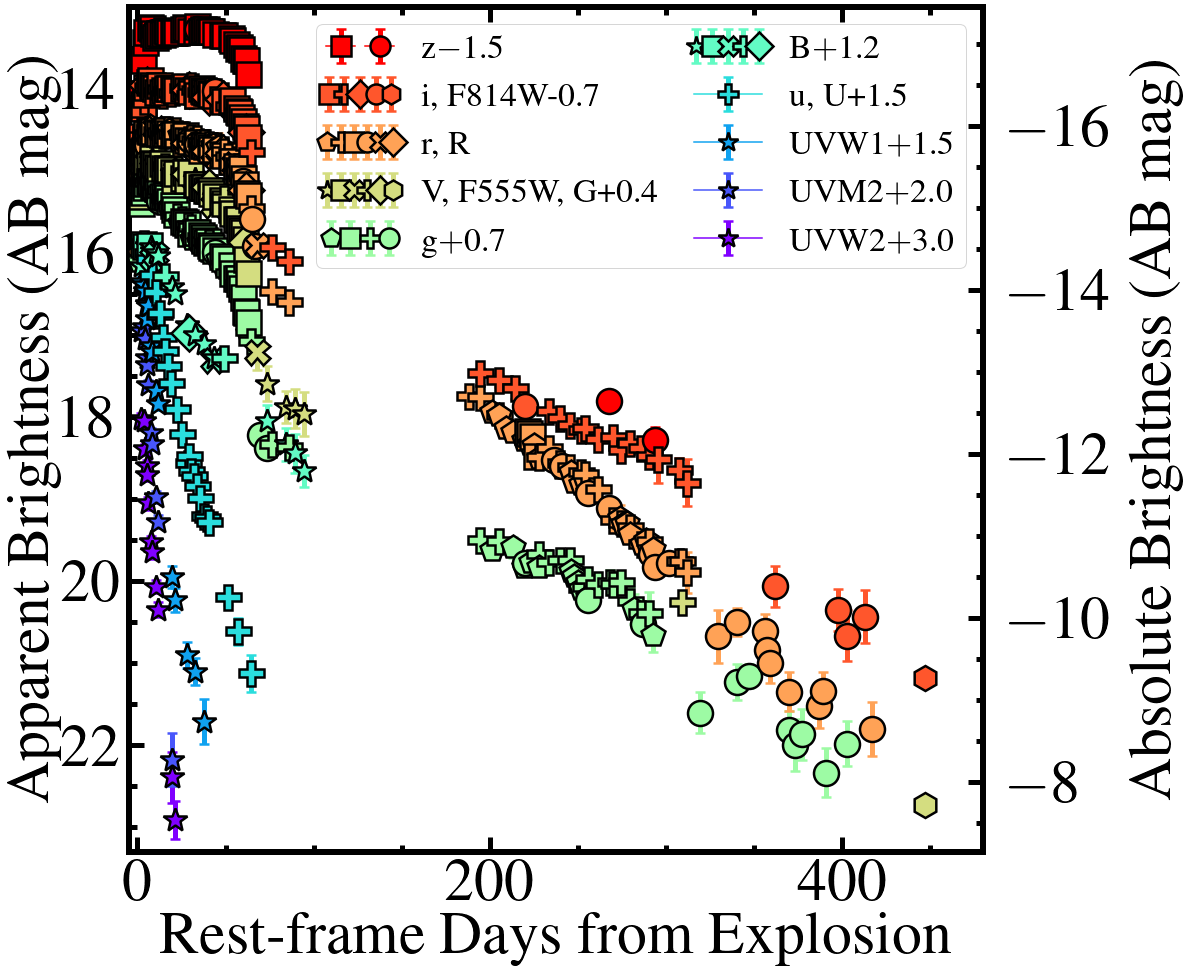

In [7]:
from astropy.time import Time
import copy
from matplotlib.legend_handler import HandlerTuple
from matplotlib.container import ErrorbarContainer
from matplotlib.collections import LineCollection

plt.clf()


def setup_ticks(ax):

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=0.8*figsize, top=True, bottom=True, left=True, right=True)
    ax.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=0.8*figsize, top=True, bottom=True, left=True, right=True)

filts = {'u': ['u','up','U'], 'B': ['B'],'r':['r','rp','r-ZTF','R'],'g':['g','gp','g-ZTF'],
        'i':['i','ip','F814W'],'UVM2':['UVM2'],'UVW1':['UVW1'],'UVW2':['UVW2'],'V':['V','F555W','G'],'z':['z']}
label_map={'r':'r, R','u':'u, U','V':'V, F555W, G','i':'i, F814W'}
tels = {'Lulin':'s', 'Nickel':'D','P48':'p','Pan-STARRS1':'o','Siding':'P','Swift':'*','Thacher':'s','HST':'h',
       'Auburn':'X'}
filt_list = ['UVW2','UVM2','UVW1','u','B','g','V','r','i','z']
off_list  = [3.0   ,2.0   ,1.5   ,1.5,1.2,0.7  ,0.4,0.0,-0.7,-1.5]
colors = cm.rainbow(np.linspace(0, 1, len(filt_list)))

table = import_table2('tmp')
auburn = import_table('auburn.txt','Auburn')
table = vstack([table, auburn])

mask = table['FLT']=='U'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.

mask=table['FLT']=='UVW1'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.

mask=table['FLT']=='UVM2'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.

mask=table['FLT']=='UVW2'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.
        
table = unique(table, keys=['MJD'])
#table = import_table('thacher.txt','Thacher')

table['MJD']    = table['MJD'].astype(float)
table['MAG']    = table['MAG'].astype(float)
table['MAGERR'] = table['MAGERR'].astype(float)

xlim = [np.min(table['MJD']), np.max(table['MJD'])]
ylim = [np.max(table['MAG']), np.max(table['MAG'])]

# Set up periodogram plot parameters
rc('font',**{'family':'serif','serif':['Times'],'size':6.0*figsize})
rc('text', usetex=True, color=black)
fig, ax = setup_plot(size=[1.8, 1.5])

#ref_date = Time('2020-05-06 04:51:41.184').mjd
ref_date = 58974.14
z=0.00502

setup_ticks(ax)
setup_axis_titles(ax,'Rest-frame Days from Explosion','Apparent Brightness (AB mag)')

labels = []
label_dict = {}

newtable = table.copy()[:0]

zmask = table['FLT']=='z'
ztable = table[zmask]
ztable.sort('MJD')
print(ztable)

for row in table:
        
    filt = row['FLT'].strip()
    tele = row['TELESCOPE'].strip()
            
    if tele not in tels.keys(): continue
    
    psym = tels[tele]
    metafilt = ''
    for key in filts:
        if filt in filts[key]:
            metafilt=key
            break
        
    if not metafilt:
        continue
    
    if metafilt=='z':
        print(row['MJD'],row['MAG'],row['MAGERR'])
    
    if row['MAGERR']>0.33 or row['MAGERR']==0.0:
        continue    
    
    label = None
    if metafilt+psym not in labels:
        labels.append(metafilt+psym)
        label = metafilt
    
    zorder=5
    if row['TELESCOPE']=='HST':
        zorder=1
    
    idx = filt_list.index(metafilt)
    newtable.add_row(row)
    axp=ax.errorbar((row['MJD']-ref_date)/(1+z), row['MAG']+off_list[idx], yerr=row['MAGERR'], 
                    xerr=None,
                color=colors[idx], ms=2.5*figsize, marker=psym,
                markeredgewidth=0.25*figsize, markeredgecolor=black,
                elinewidth=0.5*figsize,
                capsize=0.5*figsize,capthick=0.25*figsize,
               label=label,zorder=zorder)
    
    if label:
        #t=ErrorbarContainer((axp[0],axp[2]))
        if metafilt in label_dict.keys():
            label_dict[metafilt].append(axp)
        else:
            label_dict[metafilt]=[axp]

legend_tuples=[]
legend_labels=[]
for i,filt in enumerate(np.flip(filt_list)):
    if filt in label_dict.keys():
        if filt in label_map.keys():
            if np.flip(off_list)[i]==0:
                lab = label_map[filt]
            else:
                off = np.flip(off_list)[i]
                if float(off)<0:
                    lab = label_map[filt]+'-'+('%1.1f'%np.abs(off))
                else:
                    lab = label_map[filt]+'+'+('%1.1f'%np.abs(off))
            legend_labels.append(lab)
        else:
            if np.flip(off_list)[i]==0:
                lab = filt
            else:
                off = np.flip(off_list)[i]
                if float(off)<0:
                    lab = filt+'$-$'+('%1.1f'%np.abs(off))
                else:
                    lab = filt+'$+$'+('%1.1f'%np.abs(off))
            legend_labels.append(lab)
                        
        legend_tuples.append(tuple(label_dict[filt]))

plt.legend(legend_tuples, legend_labels, ncol=2, fontsize=3.4*figsize,
           handler_map={tuple: HandlerTuple(ndivide=None)},loc='upper right',
          markerscale=0.8,borderpad=0.3,columnspacing=1.0)

#ax.legend(loc='upper right', ncol=2, fontsize=2*figsize)
plt.xlim([-5,480])
#plt.xlim([350,450])
plt.ylim([23.3,13])
#plt.ylim([23.3,19])

ax2 = ax.twinx() 
offset = 30.45
ax2.set_ylabel('Absolute Brightness (AB mag)', labelpad=1.6*figsize)

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=2.5*figsize, top=True, bottom=True, left=False, right=True)
ax2.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=2.5*figsize, top=True, bottom=True, left=False, right=True)

ax2.set_ylim(23.3-offset, 13-offset)

newtable.rename_column('MJD','mjd')
newtable.rename_column('MAG','mag')
newtable.rename_column('MAGERR','dmag')
newtable.rename_column('FLT','filter')

newtable.write('2020jfo_photometry_final.dat', format='ascii', overwrite=True)

name = '2020jfo-lightcurve.eps'

plt.tight_layout(pad=1.0, w_pad=1, h_pad=1)
plt.savefig(name, format='eps')

plt.show()

   MJD    FLT  MAG   MAGERR  TELESCOPE  VARLIST FLUXCAL FLUXCALERR MAGSYS VARLIST: nondet
--------- --- ------ ------ ----------- ------- ------- ---------- ------ -------- ------
 58976.17   z  15.55   0.04     Thacher     0.0    0.04       0.04   None     OBS:  False
 58977.19   z 15.143  0.029     Thacher     0.0   0.029      0.029   None     OBS:  False
58978.193   z 14.925  0.016     Thacher     0.0   0.016      0.016   None     OBS:  False
58979.191   z 14.805  0.014     Thacher     0.0   0.014      0.014   None     OBS:  False
58981.196   z 14.741  0.014     Thacher     0.0   0.014      0.014   None     OBS:  False
58982.195   z 14.763  0.014     Thacher     0.0   0.014      0.014   None     OBS:  False
58983.221   z 14.822  0.015     Thacher     0.0   0.015      0.015   None     OBS:  False
 58983.29   z 14.805  0.004 Pan-STARRS1       0   0.004      0.004   None     OBS:  False
58984.196   z 14.863  0.018     Thacher     0.0   0.018      0.018   None     OBS:  False
58985.196 

<Figure size 432x288 with 0 Axes>

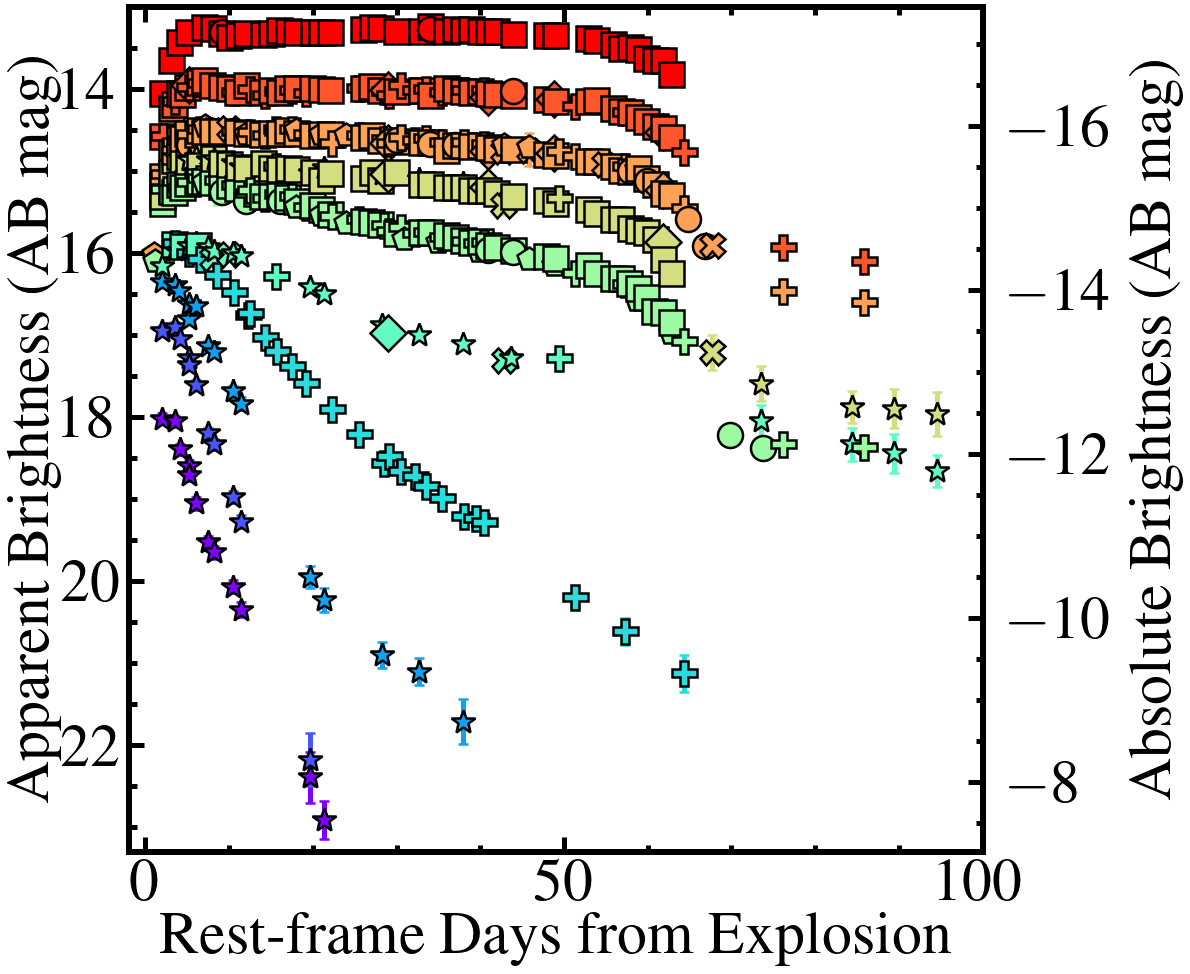

In [8]:
from astropy.time import Time
import copy
from matplotlib.legend_handler import HandlerTuple
from matplotlib.container import ErrorbarContainer
from matplotlib.collections import LineCollection

plt.clf()


def setup_ticks(ax):

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=0.8*figsize, top=True, bottom=True, left=True, right=True)
    ax.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=0.8*figsize, top=True, bottom=True, left=True, right=True)

filts = {'u': ['u','up','U'], 'B': ['B'],'r':['r','rp','r-ZTF','R'],'g':['g','gp','g-ZTF'],
        'i':['i','ip','F814W'],'UVM2':['UVM2'],'UVW1':['UVW1'],'UVW2':['UVW2'],'V':['V','F555W','G'],'z':['z']}
label_map={'r':'r, R','u':'u, U','V':'V, F555W, G','i':'i, F814W'}
tels = {'Lulin':'s', 'Nickel':'D','P48':'p','Pan-STARRS1':'o','Siding':'P','Swift':'*','Thacher':'s','HST':'h',
       'Auburn':'X'}
filt_list = ['UVW2','UVM2','UVW1','u','B','g','V','r','i','z']
off_list  = [3.0   ,2.0   ,1.5   ,1.5,1.2,0.7  ,0.4,0.0,-0.7,-1.5]
colors = cm.rainbow(np.linspace(0, 1, len(filt_list)))

table = import_table2('tmp')
auburn = import_table('auburn.txt','Auburn')
table = vstack([table, auburn])

mask = table['FLT']=='U'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.

mask=table['FLT']=='UVW1'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.

mask=table['FLT']=='UVM2'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.

mask=table['FLT']=='UVW2'
for i,row in enumerate(table):
    if mask[i]:
        table[i]['MAG']=table[i]['MAG']-0.
        
table = unique(table, keys=['MJD'])
#table = import_table('thacher.txt','Thacher')

table['MJD']    = table['MJD'].astype(float)
table['MAG']    = table['MAG'].astype(float)
table['MAGERR'] = table['MAGERR'].astype(float)

xlim = [np.min(table['MJD']), np.max(table['MJD'])]
ylim = [np.max(table['MAG']), np.max(table['MAG'])]

# Set up periodogram plot parameters
rc('font',**{'family':'serif','serif':['Times'],'size':6.0*figsize})
rc('text', usetex=True, color=black)
fig, ax = setup_plot(size=[1.8, 1.5])

#ref_date = Time('2020-05-06 04:51:41.184').mjd
ref_date = 58974.14
z=0.00502

setup_ticks(ax)
setup_axis_titles(ax,'Rest-frame Days from Explosion','Apparent Brightness (AB mag)')

labels = []
label_dict = {}

newtable = table.copy()[:0]

zmask = table['FLT']=='z'
ztable = table[zmask]
ztable.sort('MJD')
print(ztable)

for row in table:
        
    filt = row['FLT'].strip()
    tele = row['TELESCOPE'].strip()
            
    if tele not in tels.keys(): continue
    
    psym = tels[tele]
    metafilt = ''
    for key in filts:
        if filt in filts[key]:
            metafilt=key
            break
        
    if not metafilt:
        continue
    
    if metafilt=='z':
        print(row['MJD'],row['MAG'],row['MAGERR'])
    
    if row['MAGERR']>0.33 or row['MAGERR']==0.0:
        continue    
    
    label = None
    if metafilt+psym not in labels:
        labels.append(metafilt+psym)
        label = metafilt
    
    zorder=5
    if row['TELESCOPE']=='HST':
        zorder=1
    
    idx = filt_list.index(metafilt)
    newtable.add_row(row)
    axp=ax.errorbar((row['MJD']-ref_date)/(1+z), row['MAG']+off_list[idx], yerr=row['MAGERR'], 
                    xerr=None,
                color=colors[idx], ms=2.5*figsize, marker=psym,
                markeredgewidth=0.25*figsize, markeredgecolor=black,
                elinewidth=0.5*figsize,
                capsize=0.5*figsize,capthick=0.25*figsize,
               label=label,zorder=zorder)
    
    if label:
        #t=ErrorbarContainer((axp[0],axp[2]))
        if metafilt in label_dict.keys():
            label_dict[metafilt].append(axp)
        else:
            label_dict[metafilt]=[axp]

legend_tuples=[]
legend_labels=[]
for i,filt in enumerate(np.flip(filt_list)):
    if filt in label_dict.keys():
        if filt in label_map.keys():
            if np.flip(off_list)[i]==0:
                lab = label_map[filt]
            else:
                off = np.flip(off_list)[i]
                if float(off)<0:
                    lab = label_map[filt]+'-'+('%1.1f'%np.abs(off))
                else:
                    lab = label_map[filt]+'+'+('%1.1f'%np.abs(off))
            legend_labels.append(lab)
        else:
            if np.flip(off_list)[i]==0:
                lab = filt
            else:
                off = np.flip(off_list)[i]
                if float(off)<0:
                    lab = filt+'$-$'+('%1.1f'%np.abs(off))
                else:
                    lab = filt+'$+$'+('%1.1f'%np.abs(off))
            legend_labels.append(lab)
                        
        legend_tuples.append(tuple(label_dict[filt]))

#plt.legend(legend_tuples, legend_labels, ncol=2, fontsize=3.6*figsize,
#           handler_map={tuple: HandlerTuple(ndivide=None)},loc='upper right',
#          markerscale=0.8,borderpad=0.3,columnspacing=1.0)

#ax.legend(loc='upper right', ncol=2, fontsize=2*figsize)
plt.xlim([-2,100])
#plt.xlim([350,450])
plt.ylim([23.3,13])
#plt.ylim([23.3,19])

ax2 = ax.twinx() 
offset = 30.45
ax2.set_ylabel('Absolute Brightness (AB mag)', labelpad=1.6*figsize)

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=2.5*figsize, top=True, bottom=True, left=False, right=True)
ax2.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=2.5*figsize, top=True, bottom=True, left=False, right=True)

ax2.set_ylim(23.3-offset, 13-offset)

newtable.rename_column('MJD','mjd')
newtable.rename_column('MAG','mag')
newtable.rename_column('MAGERR','dmag')
newtable.rename_column('FLT','filter')

newtable.write('2020jfo_photometry_final.dat', format='ascii', overwrite=True)

name = '2020jfo-lightcurve-early.eps'

plt.tight_layout(pad=1.0, w_pad=1, h_pad=1)
plt.savefig(name, format='eps')

plt.show()

In [4]:
for row in table:
    mjd='%5.3f'%row['MJD']
    mag='%2.3f'%row['MAG']
    err='%1.3f'%row['MAGERR']
    source=row['TELESCOPE']
    filt=row['FLT']
    if filt in ['up','rp','gp','ip']:
        filt=filt.replace('p','')
    if row['MAG']<0.0 or np.isnan(row['MAG']):
        continue
    if row['TELESCOPE'] in ['Siding','LCO','LCOGT'] and filt in ['u','g','r','i']:
        filt=filt+'^{\prime}'
    if filt not in ['UVM2','UVW1','UVW2']:
        filt='$'+filt+'$'
    if '-ZTF' in filt:
        filt=filt.replace('-ZTF','')
    if row['MAGERR']==0.0 or row['MAGERR']>0.3:
        err='--'
        mag='$>$'+mag
    
    source_map={'Siding':'Las Cumbres','P48':'ZTF'}
    if source in ['ATLAS','Gaia']:
        continue
    elif source in source_map.keys():
        source=source_map[source]
        
    if source=='ZTF': continue
    
    if row['MJD']<58975:
        continue
        
    print(mjd,'&',filt,'&',mag,'&',err,'&',source,'\\\\')

58976.095 & UVW1 & 14.855 & 0.059 & Swift \\
58976.097 & $U_S$ & 14.357 & 0.054 & Swift \\
58976.098 & $B$ & 14.955 & 0.045 & Swift \\
58976.099 & UVW2 & 15.025 & 0.067 & Swift \\
58976.102 & $V$ & 14.842 & 0.064 & Swift \\
58976.103 & UVM2 & 14.954 & 0.059 & Swift \\
58976.111 & $r^{\prime}$ & 15.077 & 0.015 & Las Cumbres \\
58976.156 & $g$ & 14.695 & 0.027 & Thacher \\
58976.161 & $r$ & 15.063 & 0.016 & Thacher \\
58976.164 & $i$ & 15.270 & 0.020 & Thacher \\
58976.170 & $z$ & 15.550 & 0.040 & Thacher \\
58976.174 & $V$ & 14.901 & 0.019 & Thacher \\
58976.300 & $g^{\prime}$ & 14.516 & 0.044 & Las Cumbres \\
58976.301 & $r^{\prime}$ & 15.043 & 0.076 & Las Cumbres \\
58976.302 & $i^{\prime}$ & 15.278 & 0.020 & Las Cumbres \\
58977.177 & $g$ & 14.542 & 0.013 & Thacher \\
58977.183 & $r$ & 14.773 & 0.011 & Thacher \\
58977.185 & $i$ & 14.939 & 0.011 & Thacher \\
58977.190 & $z$ & 15.143 & 0.029 & Thacher \\
58977.197 & $V$ & 14.619 & 0.013 & Thacher \\
58977.545 & $B$ & 14.695 & 0.023 & 

59003.264 & $B$ & 15.781 & 0.086 & Nickel \\
59003.267 & $V$ & 14.637 & 0.034 & Nickel \\
59003.269 & $r$ & 14.656 & 0.030 & Nickel \\
59003.271 & $i$ & 14.720 & 0.030 & Nickel \\
59003.337 & $u^{\prime}$ & 16.981 & 0.041 & Las Cumbres \\
59003.339 & $g^{\prime}$ & 15.031 & 0.013 & Las Cumbres \\
59003.340 & $r^{\prime}$ & 14.658 & 0.012 & Las Cumbres \\
59003.341 & $i^{\prime}$ & 14.772 & 0.011 & Las Cumbres \\
59004.248 & $g$ & 15.063 & 0.024 & Thacher \\
59004.254 & $r$ & 14.631 & 0.016 & Thacher \\
59004.257 & $i$ & 14.723 & 0.020 & Thacher \\
59004.262 & $z$ & 14.800 & 0.026 & Thacher \\
59004.268 & $V$ & 14.613 & 0.114 & Thacher \\
59004.310 & $r$ & 14.625 & 0.003 & Pan-STARRS1 \\
59004.806 & $u^{\prime}$ & 17.163 & 0.032 & Las Cumbres \\
59004.808 & $g^{\prime}$ & 14.980 & 0.013 & Las Cumbres \\
59004.809 & $r^{\prime}$ & 14.591 & 0.011 & Las Cumbres \\
59004.810 & $i^{\prime}$ & 14.657 & 0.010 & Las Cumbres \\
59006.473 & $u^{\prime}$ & 17.219 & 0.033 & Las Cumbres \\
59006.475

59180.506 & $g^{\prime}$ & 18.819 & 0.070 & Las Cumbres \\
59180.507 & $r^{\prime}$ & 17.980 & 0.041 & Las Cumbres \\
59180.508 & $i^{\prime}$ & 18.251 & 0.079 & Las Cumbres \\
59189.733 & $i^{\prime}$ & 18.352 & 0.129 & Las Cumbres \\
59194.922 & UVW1 & $>$20.789 & -- & Swift \\
59194.925 & $U_S$ & $>$20.244 & -- & Swift \\
59194.926 & $B$ & $>$19.406 & -- & Swift \\
59194.927 & UVW2 & $>$21.196 & -- & Swift \\
59194.932 & $V$ & $>$17.060 & -- & Swift \\
59194.933 & UVM2 & $>$20.620 & -- & Swift \\
59195.580 & $g$ & 19.085 & 0.041 & Pan-STARRS1 \\
59195.590 & $i$ & 18.566 & 0.028 & Pan-STARRS1 \\
59196.577 & $r$ & 18.167 & 0.102 & Thacher \\
59197.576 & $r$ & 18.202 & 0.064 & Thacher \\
59199.541 & $r$ & 18.229 & 0.052 & Thacher \\
59201.546 & $r$ & 18.478 & 0.064 & Thacher \\
59203.533 & $g^{\prime}$ & 18.974 & 0.094 & Las Cumbres \\
59203.534 & $r^{\prime}$ & 18.492 & 0.056 & Las Cumbres \\
59207.272 & UVW1 & $>$20.994 & -- & Swift \\
59207.273 & $U_S$ & $>$20.552 & -- & Swift \\
59

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


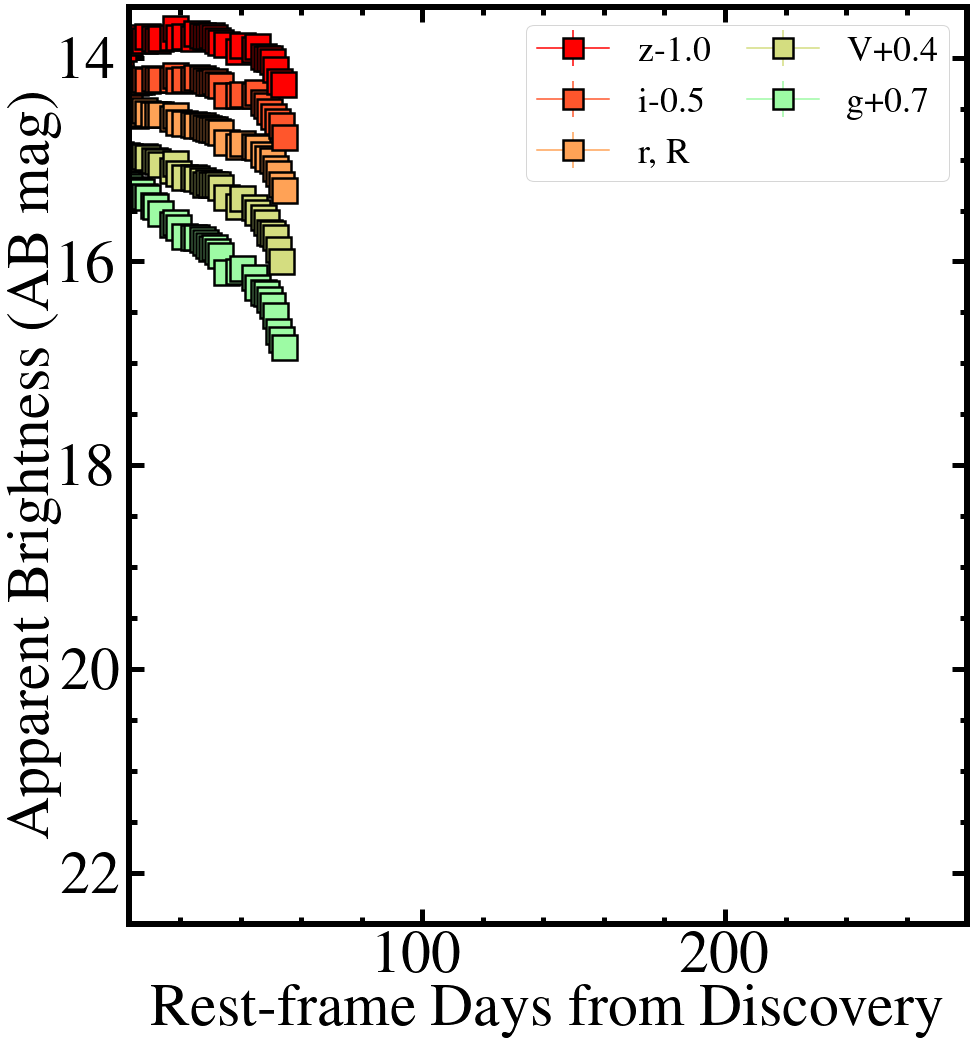

In [5]:
from astropy.time import Time
import copy
from matplotlib.legend_handler import HandlerTuple
from matplotlib.container import ErrorbarContainer


filts = {'u': ['u','up','U'], 'B': ['B'],'r':['r','rp','r-ZTF','R'],'g':['g','gp','g-ZTF'],
        'i':['i','ip'],'UVM2':['UVM2'],'UVW1':['UVW1'],'UVW2':['UVW2'],'V':['V'],'z':['z']}
label_map={'r':'r, R','u':'u, U'}
tels = {'Lulin':'s', 'Nickel':'D','P48':'p','Pan-STARRS1':'o','Siding':'P','Swift':'*','Thacher':'s'}
filt_list = ['UVW2','UVM2','UVW1','u','B','g','V','r','i','z']
off_list  = [3.0   ,2.0   ,1.5   ,1.5,1.2,0.7  ,0.4,0.0,-0.5,-1.0]
colors = cm.rainbow(np.linspace(0, 1, len(filt_list)))

#table = import_snana('2020jfo_data.snana.txt')
table = import_table('thacher.txt','Thacher')

table['MJD']    = table['MJD'].astype(float)
table['MAG']    = table['MAG'].astype(float)
table['MAGERR'] = table['MAGERR'].astype(float)

xlim = [np.min(table['MJD']), np.max(table['MJD'])]
ylim = [np.max(table['MAG']), np.max(table['MAG'])]

# Set up periodogram plot parameters
rc('font',**{'family':'serif','serif':['Times'],'size':6.0*figsize})
rc('text', usetex=True, color=black)
fig, ax = setup_plot(size=[1.5, 1.6])

ref_date = Time('2020-05-14T00:00:00').mjd

setup_ticks(ax)
setup_axis_titles(ax,'Rest-frame Days from Discovery','Apparent Brightness (AB mag)')

labels = []
label_dict = {}

for row in table:
        
    filt = row['FLT'].strip()
    tele = row['TELESCOPE'].strip()
            
    if tele not in tels.keys(): continue
    
    psym = tels[tele]
    metafilt = ''
    for key in filts:
        if filt in filts[key]:
            metafilt=key
            break
        
    if not metafilt:
        continue
    
    if row['MAGERR']>0.3 or row['MAGERR']==0.0:
        continue    
    
    label = None
    if metafilt+psym not in labels:
        labels.append(metafilt+psym)
        label = metafilt
    
    idx = filt_list.index(metafilt)
    axp=ax.errorbar(row['MJD']-ref_date, row['MAG']+off_list[idx], yerr=row['MAGERR'], 
                color=colors[idx], ms=2.5*figsize, marker=psym,
                markeredgewidth=0.25*figsize, markeredgecolor=black,
               label=label)
    
    if label:
        #t=ErrorbarContainer((axp[0],axp[2]))
        if metafilt in label_dict.keys():
            label_dict[metafilt].append(axp)
        else:
            label_dict[metafilt]=[axp]

legend_tuples=[]
legend_labels=[]
for i,filt in enumerate(np.flip(filt_list)):
    if filt in label_dict.keys():
        if filt in label_map.keys():
            if np.flip(off_list)[i]==0:
                lab = label_map[filt]
            else:
                off = np.flip(off_list)[i]
                if float(off)<0:
                    lab = label_map[filt]+'-'+('%1.1f'%np.abs(off))
                else:
                    lab = label_map[filt]+'+'+('%1.1f'%np.abs(off))
            legend_labels.append(lab)
        else:
            if np.flip(off_list)[i]==0:
                lab = filt
            else:
                off = np.flip(off_list)[i]
                if float(off)<0:
                    lab = filt+'-'+('%1.1f'%np.abs(off))
                else:
                    lab = filt+'+'+('%1.1f'%np.abs(off))
            legend_labels.append(lab)
        legend_tuples.append(tuple(label_dict[filt]))

plt.legend(legend_tuples, legend_labels, ncol=2, fontsize=3.6*figsize,
           handler_map={tuple: HandlerTuple(ndivide=None)},loc='upper right',
          markerscale=0.8,borderpad=0.3,columnspacing=1.0)

#ax.legend(loc='upper right', ncol=2, fontsize=2*figsize)
plt.xlim([3,280])
plt.ylim([22.5,13.5])

ylim=[26.5,13.5]
#cycle29=[59488.00000000,59852.00000000]
#cycle29_range = mpatches.Rectangle((cycle29[0]-ref_date, ylim[0]), cycle29[1]-cycle29[0], 
#                                          ylim[1]-ylim[0],facecolor='gainsboro')

#ax.vlines(cycle29[0]-ref_date, ylim[0], ylim[1], linestyle='dotted', linewidth=0.3*figsize)
#props = dict(boxstyle='round', facecolor='white')
#ax.text(690,19,'Cycle 29', fontsize=5.0*figsize,
#        verticalalignment='center', 
#        horizontalalignment='center', bbox=props)

#ax.text(650, 24.8, 'F625W', rotation=311, color=colors[7])
#ax.text(625, 22.7, 'F814W-0.5', rotation=318, color=colors[8])

#ax.add_patch(cycle29_range)

dates = np.linspace(250,877,1000)

mag_i = 18.5+0.012*(dates-250)
mag_r = 18.9+0.015*(dates-250)

#ax.plot(dates, mag_i, linestyle='dashed', color=colors[8], linewidth=0.5*figsize)
#ax.plot(dates, mag_r, linestyle='dashed', color=colors[7], linewidth=0.5*figsize)

name = '2020jfo-lightcurve.eps'

plt.tight_layout(pad=1.0, w_pad=1, h_pad=1)
plt.savefig(name, format='eps')

plt.show()

In [6]:
from astropy.time import Time
xrt = Table.read('2020jfo_xrt_limits',format='ascii',names=('MJD','limit'))
xrt.sort('MJD')
MW_AV=0.061
MW_NH=2.21e21*MW_AV # Following Guver & Ozel
flux_conv = 3.394E-14/(1e-3)
ref_date = Time('2020-05-06 04:51:41.184').mjd

print(len(xrt[xrt['MJD']>ref_date]))
print(ref_date)

print(np.min(xrt['limit']))
print(np.max(xrt['limit']))

flux_limit = xrt['limit'] * flux_conv
for row in xrt:
    if row['MJD']-ref_date>0:
        print(Time(row['MJD'],format='mjd').datetime.strftime('%Y-%m-%d'))
        print(row['limit'])
        lum=row['limit']*flux_conv*4*np.pi*(3.08568025e18*10.1e6)**2*1.0e-39
        print '%2.1f'%(row['MJD']-ref_date)+' '+'%2.1f'%lum 
        

SyntaxError: invalid syntax (1036495019.py, line 21)

In [ ]:
from __future__ import print_function

#stable = import_snana('tmp')
#table = import_table('2020jfo_swift_uvot.final',telescope='Swift')
#table=vstack([table,stable])

table.sort('MJD')

mask = table['FLT']=='U_S'
table[mask]['FLT']='U'

for row in table:
    mjd='%5.3f'%row['MJD']
    lim=(row['MAGERR'] > 0.33) | (row['MAGERR']==0.0)
    
    if float(row['MAG'])<10 or float(row['MAGERR'])<0.0:
        continue
    
    filt=row['FLT']
    
    mag='%2.3f'%row['MAG']
    magerr='%1.3f'%row['MAGERR']
    tel=row['TELESCOPE']
    
    if lim: 
        mag='$>$'+mag
        magerr='--'
    
    if filt in ['up','rp','gp','ip']:
        filt = filt.replace('p','')
        filt = '$'+filt+'^{\prime}$'
    elif 'ZTF' in filt:
        filt = filt.replace('-ZTF','')
        filt = '$'+filt+'$'
    elif filt in ['UVM2','UVW1','UVW2']:
        filt = filt
    else:
        filt = '$'+filt+'$'
    
    source_map={'Siding':'Las Cumbres','P48':'ZTF'}
    if tel in source_map.keys():
        tel=source_map[tel]
    
    #print(mjd,'&',filt,'&',mag,'&',magerr,'&',tel,'\\\\')

# Write out photometry filter files
file_objs={}
for row in table:
    if (row['MAGERR']>0.33) | (row['MAGERR']==0.0) | (row['MAGERR']<0.0):
        continue
    
    filt=row['FLT']
    if filt in ['up','rp','gp','ip']:
        filt = filt.replace('p','')
    elif 'ZTF' in filt:
        filt = filt.replace('-ZTF','')
    elif filt=='U_S':
        filt='U'
    
    if filt in list(file_objs.keys()):
        f = open(file_objs[filt], 'a')
        
    else:
        nfilt=filt
        if filt=='UVW2': nfilt='S'
        if filt=='UVM2': nfilt='D'
        if filt=='UVW1': nfilt='A'
        fname='2020jfo_'+nfilt+'.dat'
        f = open('2020jfo_'+nfilt+'.dat','w')
        file_objs[filt]=fname
    
    out = '{0} {1} {2} \n'
    out=out.format('%5.3f'%row['MJD'],'%2.3f'%row['MAG'],'%1.3f'%row['MAGERR'])
    f.write(out)
    f.close()
    